<a href="https://colab.research.google.com/github/dwhew/data_science/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is the nicest city to live in?

Notes
*   warmest?
*   least rain?
*   has snow?
*   score based on all attributes would be the most objective (maybe number of days could be a good counter and then rank/sort. must prioritise attributes)






In [9]:
import pandas as pd
import scipy



## prelim experimention with data

In [10]:
inndf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv")
inndf.head()

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
0,2015-01-01,-3.137500,-7.4,1.0,724.241667,92.458333,1.166667,0.0,Jan,Jan-2015,2015
1,2015-01-02,-3.341667,-9.2,1.5,721.975000,94.875000,1.125000,1.6,Jan,Jan-2015,2015
2,2015-01-03,1.458333,0.4,3.2,717.537500,96.833333,1.791667,13.1,Jan,Jan-2015,2015
3,2015-01-04,2.108333,-0.2,4.6,717.608333,79.291667,3.041667,25.9,Jan,Jan-2015,2015
4,2015-01-05,-0.841667,-5.3,2.4,721.662500,74.875000,2.666667,0.3,Jan,Jan-2015,2015


In [11]:
len(inndf)

1826

In [12]:
inndf.dtypes

date                   object
mean_temp (deg C)     float64
min_temp (deg C)      float64
max_temp (deg C)      float64
mean_pressure (mb)    float64
mean_humidity (%)     float64
mean_wind (ms-1)      float64
precip_sum (mm)       float64
month                  object
month-year             object
year                    int64
dtype: object

In [13]:
inndf['year'].value_counts()

2016    366
2019    365
2018    365
2017    365
2015    365
Name: year, dtype: int64

 # load  city data

In [17]:
#inndf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv")
londf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/London_weather_2015-19.csv")
sindf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Singapore_weather_2015-19.csv')
syddf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Sydney_weather_2015-19.csv')
tehdf = pd.read_csv(r'https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Tehran_weather_2015-19.csv')





# by number of days. I.e sunny days, perfect days...

In [18]:
#no. of days without rain (annual average)
inn_nrain = len(inndf[inndf['precip_sum (mm)'] == 0.0]) /5
lon_nrain = len(londf[londf['precip_sum (mm)'] == 0.0]) /5
print(lon_nrain, inn_nrain)

# barometric pressure over 1022.689 mb indicates clear and stable (google.com)

198.0 165.8


In [19]:
#perfect days
inn_perf = inndf[(inndf["precip_sum (mm)"] == 0.0) & (inndf["max_temp (deg C)"] > 25) & (inndf["min_temp (deg C)"] > 10) & (inndf["mean_wind (ms-1)"] < 4)]
inn_perf

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
137,2015-05-18,18.804167,12.4,27.8,708.341667,62.708333,2.500000,0.0,May,May-2015,2015
155,2015-06-05,24.300000,15.0,32.1,714.460000,59.700000,1.900000,0.0,Jun,Jun-2015,2015
176,2015-06-26,19.410000,10.1,25.7,714.620000,57.400000,2.000000,0.0,Jun,Jun-2015,2015
179,2015-06-29,20.310000,12.6,26.3,714.800000,60.800000,1.600000,0.0,Jun,Jun-2015,2015
180,2015-06-30,21.830000,12.5,29.3,714.460000,58.000000,1.800000,0.0,Jun,Jun-2015,2015
...,...,...,...,...,...,...,...,...,...,...,...
1702,2019-08-30,20.079167,13.3,28.0,715.533333,74.083333,1.750000,0.0,Aug,Aug-2019,2019
1703,2019-08-31,20.912500,13.5,30.1,712.175000,68.958333,3.416667,0.0,Aug,Aug-2019,2019
1718,2019-09-15,18.520833,11.1,27.8,717.195833,75.875000,1.375000,0.0,Sep,Sep-2019,2019
1719,2019-09-16,18.666667,11.7,27.9,713.920833,73.666667,1.416667,0.0,Sep,Sep-2019,2019


In [20]:
#create new dataframe
citystats = pd.DataFrame({'City': ['Innsbruck', 'London', 'Singapore', 'Sydney', 'Tehran']})
citystats['Days of no rain'] = [inn_nrain, lon_nrain, '', '', '']
citystats

,City,Days of no rain
0,Innsbruck,165.8
1,London,198
2,Singapore,
3,Sydney,
4,Tehran,


# by months

In [ ]:
#get average day by month
month_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

inndf_months = inndf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
londf_months = londf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
sindf_months = sindf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
syddf_months = syddf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])
tehdf_months = tehdf.groupby(by=['month']).mean().reindex(month_ordered).drop(columns=['year'])



In [24]:
#compare data frames 
inndf_months.compare(londf_months, keep_equal=True)

mean_temp (deg C)             ... precip_sum (mm)       
                   self      other  ...            self  other
month                               ...                       
Jan           -1.036986   5.452045  ...          1097.4  403.2
Feb            1.459536   5.888956  ...           445.4  281.2
Mar            6.061640   7.928891  ...           698.6  350.4
Apr           10.601215  10.405160  ...           838.1  215.0
May           14.001605  13.945328  ...          1601.9  346.2
Jun           18.983879  17.205025  ...          1666.0  357.2
Jul           19.910417  19.583573  ...          1780.3  371.2
Aug           19.554905  18.449890  ...          2318.1  420.8
Sep           14.570158  15.556601  ...          1394.3  337.0
Oct           10.473568  12.279683  ...           917.9  349.8
Nov            5.024660   8.424954  ...           635.1  422.8
Dec            0.367959   7.878952  ...           629.8  452.8

[12 rows x 14 columns]

In [26]:
# maybe the the sum of rainfall per month is more intuitive

# make a new df for groupby.sum()
inndf_sum = inndf.groupby(by=['month']).sum().reindex(month_ordered)
londf_sum = londf.groupby(by=['month']).sum().reindex(month_ordered)
# substitute into inndf_months
inndf_months['precip_sum (mm)'] = inndf_sum['precip_sum (mm)']
londf_months['precip_sum (mm)'] = londf_sum['precip_sum (mm)']
inndf_months

,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm)
month,,,,,,,
Jan,-1.036986,-4.572258,3.523226,710.995404,84.563344,2.028521,1097.4
Feb,1.459536,-2.696454,7.192199,710.668417,77.120303,2.071454,445.4
Mar,6.061640,0.803871,12.434839,709.293662,69.261675,2.447647,698.6
Apr,10.601215,4.645333,16.982667,710.002559,64.274459,2.805385,838.1
May,14.001605,8.596129,20.202581,709.830970,69.726098,2.369585,1601.9
Jun,18.983879,13.187333,25.584000,711.072269,68.044504,2.257706,1666.0
Jul,19.910417,14.322581,26.470323,711.496566,70.569659,1.934507,1780.3
Aug,19.554905,13.970323,26.247097,712.556892,72.964836,2.022288,2318.1
Sep,14.570158,9.645333,20.586000,712.863897,76.828923,1.865618,1394.3


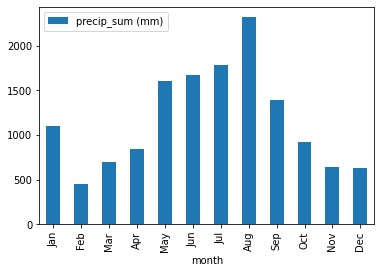

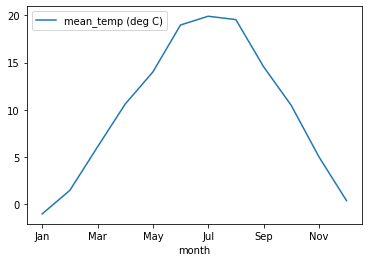

In [28]:
#graphs
inndf_months.plot(y=['precip_sum (mm)'], kind= 'bar')
inndf_months.plot(y=['mean_temp (deg C)'])

In [23]:
#Plot with subplots (still learning this one, needs work)
fig, ax = plt.subplots()

inndf_months.plot(y=['precip_sum (mm)'], kind= 'bar', ax=ax)
londf_months.plot(y=['precip_sum (mm)']), kind= 'bar', ax=ax2)

SyntaxError: ignored

# statistical comparisons

In [25]:

# Analysis of Variance Test (ANOVA) 
from scipy.stats import f_oneway

#compare mean temperatures between innsbruck and london
stat, p = f_oneway(inndf_months['mean_temp (deg C)'], londf_months['mean_temp (deg C)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Not Significantly different')
else:
	print('Significantly different')


stat=0.536, p=0.472
Not Significantly different
